### Student Information
Name: 許人中

Student ID: M133010052

GitHub ID: JamesHsu1221

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

### Dataset Summary

+ The dataset is a collection of  Youtube Comments and it was captured using the YouTube Data API. 
+ The data set consists of 1500 nostalgic and non-nostalgic comments in English.

### Languages

The language of the data is English.

### Citation
If you find this dataset usefull for your study, please cite the paper as followed:

```bibtex
@article{postalcioglu2020comparison,
  title={Comparison of Neural Network Models for Nostalgic Sentiment Analysis of YouTube Comments},
  author={Postalcioglu, Seda and Aktas, Senem},
  journal={Hittite Journal of Science and Engineering},
  volume={7},
  number={3},
  pages={215--221},
  year={2020},
  publisher={Hitit University}
}

---

## 2. Data Preparation
We can load this csv file online.

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

or we can download it and load it in our folder.

In [2]:
import pandas as pd

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

Try to display some information about dataframe.

In [3]:
print(len(df))

1500


In [4]:
df [0:5]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [5]:
df['comment'][0:5]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
Name: comment, dtype: object

In [6]:
df.sentiment[0:5]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
Name: sentiment, dtype: object

Branch to new line according to '.'

In [7]:
print("\n".join(df.comment[0].split(".")))

He was a singer with a golden voice that I love to hear all the time
 I was his great fan at the age of 16years in those days and still now
 Although we have many singers now, but, I can vouch for Jim Reeves all the time
 You feel relaxed, emotional and loving
 Thank you Lord for his life



use 'for' function to print the comment.

In [8]:
for t in df['comment'][:3]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


## 3. Data Transformation

### 3.1 Adding Columns

create new column `sentiment_number` to save `sentiment` in number.

In [9]:
for t in range(len(df)):
    if df['sentiment'][t] == 'not nostalgia':
        df.at[t,'sentiment_number'] = 0
    elif df['sentiment'][t] == 'nostalgia':
        df.at[t,'sentiment_number'] = 1
df['sentiment_number'] = df['sentiment_number'].astype(int)

print(len(df.columns)) # checking how many columns we have

3


### 3.2 Familiarizing yourself with the Data

query the last 10 records

In [10]:
# a simple query
df[-10:][["comment","sentiment"]]

,comment,sentiment
1490,"He really isn't my cup of tea, but some of his...",not nostalgia
1491,real music...how i miss those days...brings ba...,nostalgia
1492,i used to cry over this song cause i had a boy...,nostalgia
1493,"He really has that ""love you like a brother"" l...",not nostalgia
1494,That's funny. But Leo really is a nice guy. He...,not nostalgia
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia
1499,This is the first CD I bought after my marriag...,nostalgia


In [11]:
# using loc (by label)
df.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [12]:
# using iloc (by position)
df.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

In [13]:
df[::10][:10]

,sentiment,comment,sentiment_number
0,not nostalgia,He was a singer with a golden voice that I lov...,0
10,not nostalgia,ill bet if they begin to play this song on the...,0
20,nostalgia,So many happy memories of the Jim reeves album...,1
30,nostalgia,remembering the good old days,1
40,nostalgia,My late mom's favorite when I was a young boy....,1
50,nostalgia,"If I remember correctly, this song came out af...",1
60,nostalgia,I have listened to Distant Drums since my tee...,1
70,nostalgia,Reminds me of my parents... in happy times..,1
80,not nostalgia,"Uhh man, music like this was alive back in the...",0
90,nostalgia,I remember listening to this classic song on K...,1


In [14]:
df.loc[lambda f:f.sentiment =='nostalgia'].iloc[0:10:2]

,sentiment,comment,sentiment_number
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
11,nostalgia,this song came out my senior year in high scho...,1
13,nostalgia,I am 47 and grew up on songs of this type. I ...,1


## 4. Data Mining using Pandas

### 4.1 Missing Values

check missing values

In [15]:
df.isnull()

,sentiment,comment,sentiment_number
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


use function to know how many missing value in every column.

In [16]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


adding missing value to original dataframe.

In [17]:
# create missing value and combine with original dataframe
missing_value = [{'comment': '(missing value test)',
              }]

df_missing = pd.concat([df, pd.DataFrame(missing_value)], ignore_index=True)

len(df_missing)

1501

In [18]:
import helpers.data_mining_helpers as dmh

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,1


delete the row if the dataframe have missing value.

In [19]:
df_missing.dropna(inplace=True)

print(len(df_missing))

df_missing.isnull().apply(lambda x: dmh.check_missing_values(x))

1500


,sentiment,comment,sentiment_number
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data

detect how many rows are duplicate.

In [20]:
sum(df.duplicated())

1

if we want to know which row is duplicated we can search like this.

In [21]:
print(df[df.duplicated(keep=False)])

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_number  
62                 0  
78                 0  


we can delete the duplicates row bu using `drop_duplicated`.

In [22]:
df_delete_duplicated = df.drop_duplicates(keep='first', inplace=False) # keep the first comments and original dataframe

print(f"In the origianl dataframe, how many row's we have : {len(df)}")
print(f"After we delete the duplicated row, how many row's we have : {len(df_delete_duplicated)}")
print(f"After we delete the duplicated row, how many rows are duplicated : {sum(df_delete_duplicated.duplicated())}")

In the origianl dataframe, how many row's we have : 1500
After we delete the duplicated row, how many row's we have : 1499
After we delete the duplicated row, how many rows are duplicated : 0


We use `keep='first'`, because we want keep this comment and only delete the duplicated one.  
So only ruduce one row but not two rows.

## 5.  Data Preprocessing

### 5.1 Sampling

In [23]:
df_sample = df.sample(n=1000) #random state

len(df_sample)


1000

In [24]:
df_sample[0:20]

,sentiment,comment,sentiment_number
898,nostalgia,many good years back.,1
319,nostalgia,Old is gold. As we grew old this song gives me...,1
347,nostalgia,Definitely reminds me of school dance!,1
1146,nostalgia,The first time I managed to gather enough mone...,1
682,nostalgia,I remember the first time I heard this Skeert...,1
1307,nostalgia,This song reminds me of when my brother and I ...,1
480,nostalgia,"Anthony Walsh, no clich?? where this amazing s...",1
700,not nostalgia,"Makes heartbreak sound beautiful, it's pain s...",0
115,nostalgia,"I remember i was 11 years old, standing in my ...",1
1138,nostalgia,Every time when I listen to this song in the n...,1


use some plot to see the data distribution.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

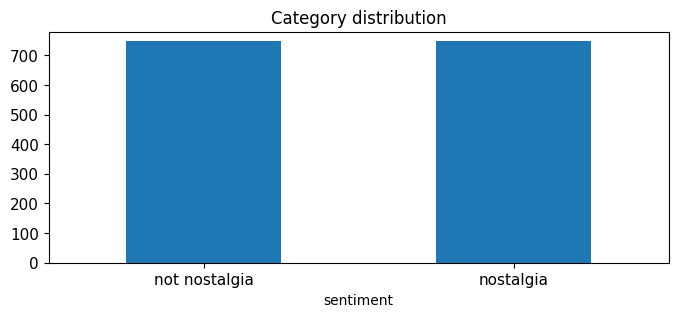

In [26]:
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0,  max(df.sentiment.value_counts()+30)],        
                                rot = 0, fontsize = 11, figsize = (8,3))

compare about number of `df` and `df_sample`.

sentiment
nostalgia        504
not nostalgia    496
Name: count, dtype: int64


Text(0.5, 0, '')

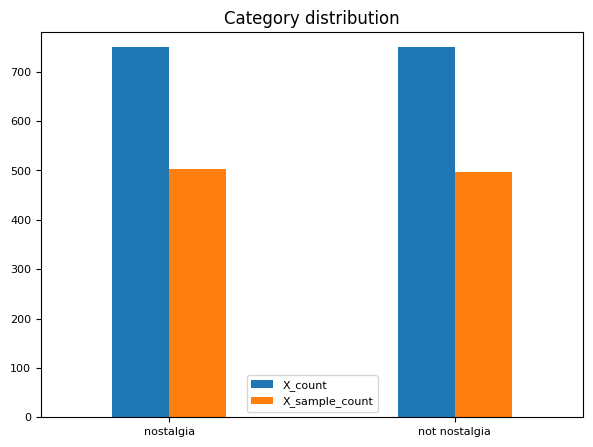

In [27]:
print(df_sample.sentiment.value_counts())

df_count = df.sentiment.value_counts()
df_sample_count = df_sample.sentiment.value_counts()

combine = pd.DataFrame({'X_count':df_count, 'X_sample_count':df_sample_count})
combine.plot(kind='bar', 
        title='Category distribution',
        ylim=[0, max(combine.max())+30], 
        width=0.4,
        rot=0, fontsize=8, figsize=(7,5))
plt.legend(prop={'size': 8})
plt.xlabel('')

### 5.2 Feature Creation

In [28]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

df[0:5]

,sentiment,comment,sentiment_number,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


Let's see what's in `unigrams`.

In [29]:
list(df[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

we can see what's the word in the index.

In [31]:
count_vect.get_feature_names_out()[1598]

'he'

use `analyzer` to filt some common words.

In [32]:
analyze = count_vect.build_analyzer()

print(f"Before analyze : {df.loc[0,'unigrams']}")
print(f"After  analyze : {analyze(df.loc[0,'comment'])}")

Before analyze : ['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'now', ',', 'but', ',', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time', '.', 'You', 'feel', 'relaxed', ',', 'emotional', 'and', 'loving', '.', 'Thank', 'you', 'Lord', 'for', 'his', 'life', '.']
After  analyze : ['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


Now let us look at the term-document matrix we built above.

In [33]:
df_counts.shape

(1500, 3730)

In [34]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [35]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

display word frequency with **heatmap**.

In [36]:
# first twenty features only
plot_x = [str(i) for i in count_vect.get_feature_names_out()[0:30]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]]

# df_counts[how many documents, how many terms]
plot_z = df_counts[0:30, 0:30].toarray()

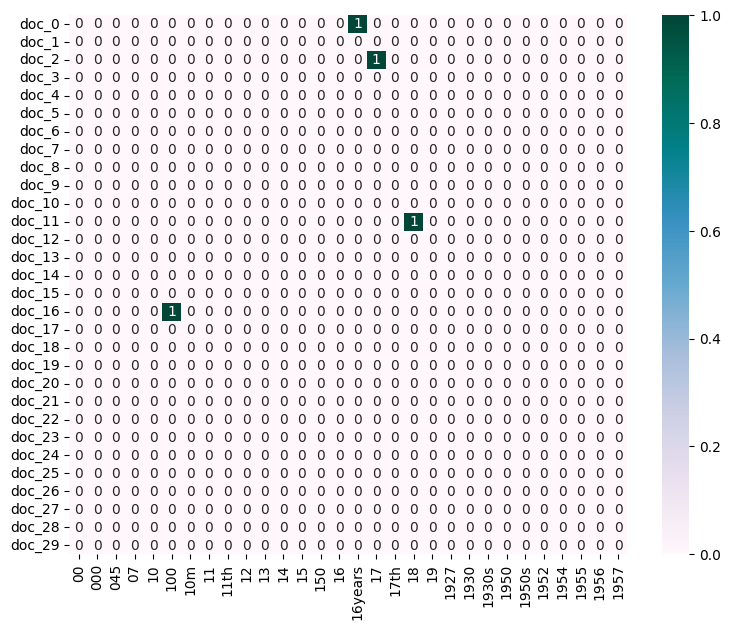

In [37]:
import seaborn as sns

df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_heatmap,
                 cmap="PuBuGn",
                 vmin=0, vmax=1, annot=True)

Search high frequency words in documents 0~30 and show on heatmap.

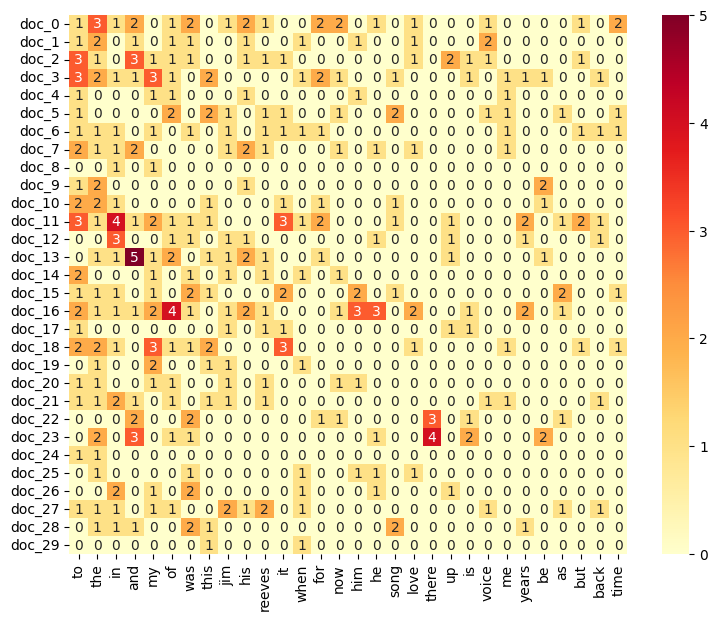

In [38]:
import numpy as np

hw_plot_y = ["doc_"+ str(i) for i in list(df.index)[0:30]] #doc 0~29
word_freq = np.array(df_counts[0:30, :].sum(axis=0)).flatten() #Find the vocabulary appear frequency in doc 0~29.
top_30_indices = np.argpartition(word_freq, -30)[-30:] #find the top 30 vocabulary's indice
high_to_low = top_30_indices[::-1]
hw_plot_z = df_counts[0:30, high_to_low].toarray() #make the form
hw_plot_x = count_vect.get_feature_names_out()[high_to_low] #change indice in the text 
Q11_df = pd.DataFrame(hw_plot_z, columns = hw_plot_x, index = hw_plot_y) #combine all the info
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(Q11_df,
                 cmap="YlOrRd",
                 vmin=0, vmax=np.max(hw_plot_z), annot=True)

### 5.4 Attribute Transformation / Aggregation

To count the total term frequency, we can use `for` to implement.

In [39]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

or we can use `np.asarray` to implement.  

In [40]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

Although both code implement the same function, but using `np.array` is faster than using `for` because it use **vectorized operations** in NumPy.  
These operations allow the computation to be applied to entire arrays at once, rather than iterating through individual elements .

In [41]:
print (term_frequencies)

[1 2 1 ... 1 1 1]


Let's see the amount of 0~150 term. (using `plotly` to make us easy to observe.)

In [42]:
import plotly.express as px

g = px.bar(x=count_vect.get_feature_names_out()[:150], 
            y=term_frequencies[:150])
g.show()

See the top 150 words by quantity.

In [43]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
g = px.bar(x=count_vect.get_feature_names_out()[top_150_indices], 
            y=term_frequencies[top_150_indices])
g.show()

using **long tail graph** to make it easier to visualize.

In [44]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
high_to_low_indices = top_150_indices[::-1]
top_150_bar = px.bar(x = count_vect.get_feature_names_out()[high_to_low_indices], 
            y = term_frequencies[high_to_low_indices],
            color = term_frequencies[high_to_low_indices], color_continuous_scale = 'Portland')
top_150_bar.update_layout(xaxis_title="term name", xaxis_tickangle=-90, yaxis_title=" amount ")

Use `log` to make the gap look less big.

In [45]:
import math
term_frequencies_log = np.array([math.log(i) for i in term_frequencies])

In [46]:
top_150_indices = np.argpartition(term_frequencies, -150)[-150:]
high_to_low_indices = top_150_indices[::-1]
top_150_bar = px.bar(x = count_vect.get_feature_names_out()[high_to_low_indices], 
            y = term_frequencies_log[high_to_low_indices],
            color = term_frequencies_log[high_to_low_indices], color_continuous_scale = 'Portland')
top_150_bar.update_layout(xaxis_title="term name", xaxis_tickangle=-90, yaxis_title=" amount ")

###  Finding frequent patterns

modify our document-term matrix to be able to work for each category.

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [48]:
category_number = 0 #You can change it from 0 or 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Use bar plot to see Term Frequency Distribution

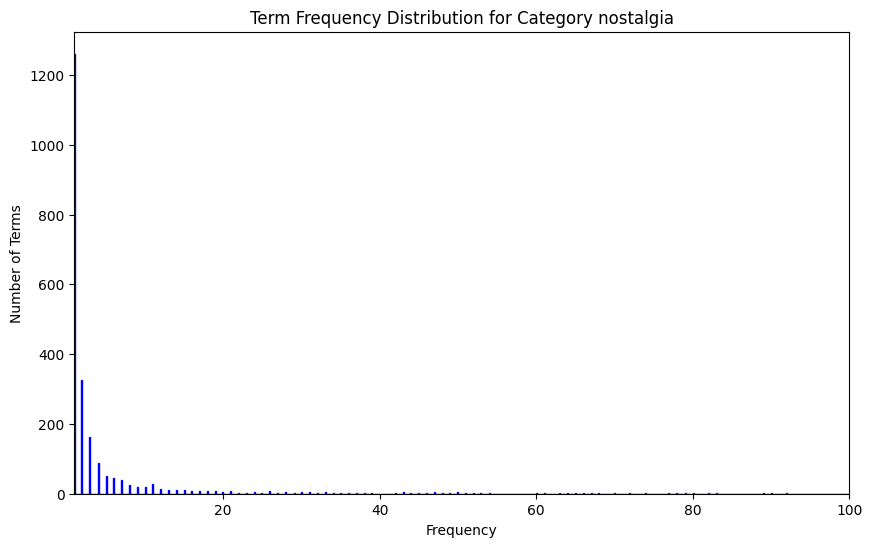

In [49]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='blue')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

Try to remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

In [50]:
category_number = 0 #You can change it from 0 or 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'not', 'on', 'be', 'can', 'voice', 'me', 'just', 'beautiful', 'songs', 'as', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'are', 'at', 'always', 'good', 'no', 'never', 'now', 'know', 'much', 'about', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'would', 'thank', 'think', 'still', 'only', 'don', 'how', 'has', 'very', 'am', 'there', 'out', 'these', 'him', 'could', 'an', 'up', 'old', 'listen', 'do', 'hear', 'singer', 'many', 'had', 'here', 'such', 'version', 'too', 'today', 'been', 'heard', 'get', 'most', 'world', 'people', 'your', 'man', 'some', 'video', 'sing', 'listening', 'years', 'real', 'than', 'were', 'nice', 'heart', 'singing', 'life', 'their', 'better', 'day', 'its', 'then', 'come', 'sad', 'god', 

In [51]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(708)

In [52]:
category_number = 1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yo', 'yet', 'yester', 'yeas', 'yearn', 'yeah', '1952', '1950', '1969', '1964', 'lp', 'safety', 'safer', 'saddest', 'seeing', 'lou', 'proud', 'protest', '2002', 'yup', '1927', '11th']


Show all in one code

In [53]:
category_number = 0 #You can change it from 0 or 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
17th          1
16years       1
1981          1
1973          1
1970          1
1969          1
1965          1
1963          1
1960s         1
12            1
10m           1
zulus         1
youngsters    1
spewing       1
spectorish    1
speaks        1
sees          1
section       1
2010          1
xd            1
wwii          1
wuv           1
writers       1
writer        1
wrenching     1
wouldn        1
dtype: int64
Top 5.0% words: 
got         23
first       23
wish        24
amazing     24
or          25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
p

,00,000,045,10,100,11,14,15,150,16,...,yet,young,younger,youngest,yourself,youth,youtube,yrs,yuo,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


create .csv file

In [54]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace space with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Show the information about transactional databases 

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


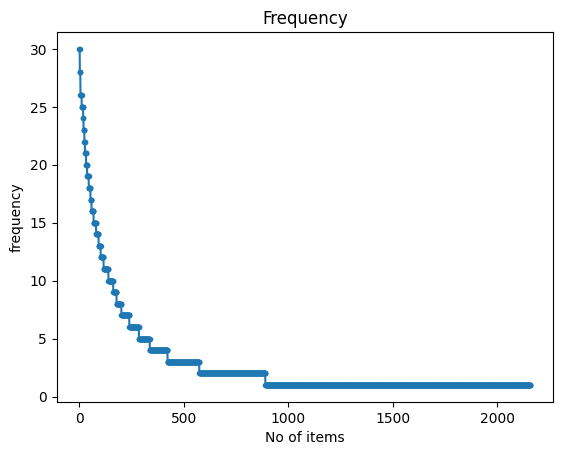

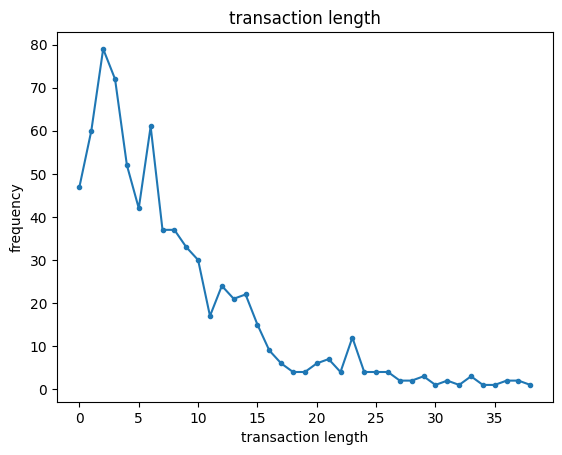

In [55]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 747
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.392235609103079
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.938560371491883
Variance in Transaction Sizes : 35.31377341358284
Sparsity : 0.9965689960715033


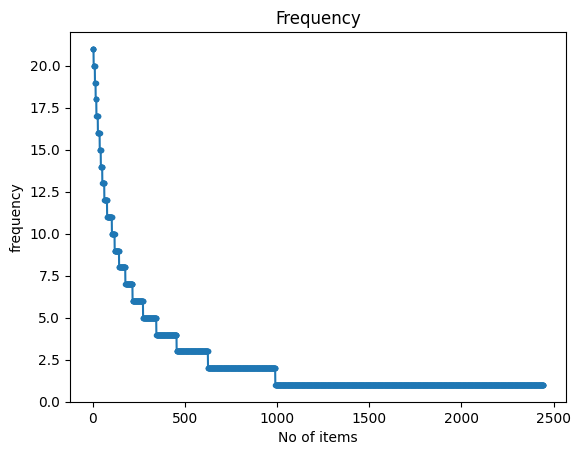

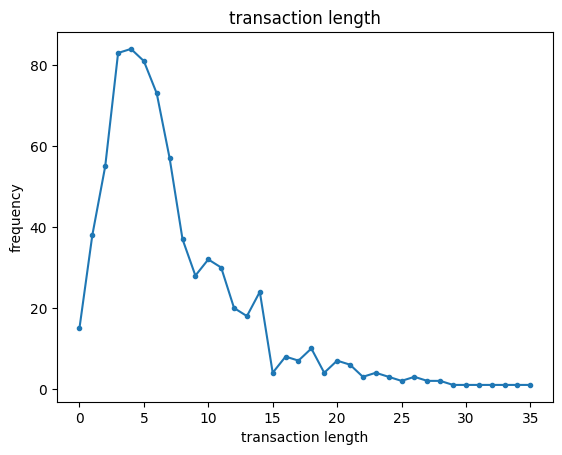

In [56]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()